In [1]:
# Getting the old original df 

import pandas as pd
original_df = pd.read_csv('final_df.csv')

original_df

#dropping the columns
original_df = original_df.drop(columns = ['subject_id', 'pre_charttime', 'prescription_start', 'post_charttime'], axis = 1)

#splitting the vectors
def clean_and_convert(x):
    if pd.notna(x):
        try:
            # Remove square brackets if they exist
            x = re.sub(r'[\[\]]', '', x)
            # Replace multiple spaces with a single space
            cleaned = re.sub(r'\s+', ' ', x.strip())
            # Convert to numpy array of floats
            return np.array([float(i) for i in cleaned.split(' ')])
        except Exception as e:
            # If there's an error during conversion, print the error and return the original value
            print(f"Error processing value: {x}. Error: {e}")
            return x  # Return the original value in case of error
    return x  # If NaN, return as is

# Check the values before applying the function
print(original_df['prescription_rx_embeddings'].head())

# Apply the function to the 'prescription_rx_embeddings' column
original_df['prescription_rx_embeddings'] = original_df['prescription_rx_embeddings'].apply(clean_and_convert)

# Check the result
print(original_df['prescription_rx_embeddings'].head())








0    [ 3.5185558e-01  1.2351961e-01 -1.2304356e-01 ...
1    [ 0.45182744  0.3218944  -0.5210766   0.315588...
2    [ 4.5976555e-01  1.9232908e-01 -5.7382131e-01 ...
3    [ 6.26637757e-01  2.61670560e-01 -2.40684357e-...
4    [ 4.15423244e-01 -1.28793076e-01 -2.01883331e-...
Name: prescription_rx_embeddings, dtype: object
Error processing value: [ 3.5185558e-01  1.2351961e-01 -1.2304356e-01 -3.3200896e-01
 -1.0614018e+00  1.9121327e-01  2.7952591e-01  1.0901182e-02
 -4.5522165e-01 -6.9268858e-01  1.5272896e-01 -6.2518787e-01
 -5.0267065e-01  2.3799901e-01  3.2225102e-01  3.5973153e-01
 -8.7883368e-02 -6.6698366e-01  1.2195622e+00  3.2569757e-01
 -9.7169526e-02 -9.6203506e-01  7.8181475e-01  3.1520061e+00
  1.0999583e+00  8.8330621e-01 -1.3076260e+00 -1.1109836e+00
 -2.1281254e+00  5.1991540e-01 -1.2142467e+00 -9.5872365e-02
 -2.3115242e-01  9.2357832e-01  7.1854466e-01 -4.1259676e-01
 -7.4190390e-01  1.6999608e+00  4.8031932e-01  8.1066114e-01
 -1.0656835e+00 -2.8141283e-03 -5.6771725e-

In [2]:
# Split the 'prescription_rx_embeddings' column into separate columns based on array elements
expanded_columns = pd.DataFrame(original_df['prescription_rx_embeddings'].tolist(), index=original_df.index)

# Optionally, rename the columns to something meaningful
expanded_columns.columns = [f'P{i}' for i in range(expanded_columns.shape[1])]

# Concatenate the expanded columns back to the original DataFrame, if needed
original_df = pd.concat([original_df, expanded_columns], axis=1)

# Drop the original 'prescription_rx_embeddings' column
original_df.drop(columns=['prescription_rx_embeddings'], inplace=True)

original_df

prescription_dose_val_rx  prescription_dose_unit_rx  pre_ph  pre_pco2  \
0                     0.010317                          0   0.500  0.741935   
1                     0.011905                         12   0.500  0.741935   
2                     0.009921                         11   0.500  0.741935   
3                     0.017857                          0   0.500  0.741935   
4                     0.020833                          0   0.500  0.741935   
...                        ...                        ...     ...       ...   
2177                  0.027778                          0   0.375  0.500000   
2178                  0.011905                         11   0.375  0.500000   
2179                  0.008026                          2   0.375  0.500000   
2180                  0.206349                         11   0.375  0.500000   
2181                  0.009921                         11   0.375  0.500000   

       pre_po2  pre_bicarbonate  pre_baseexcess  pre_totalco2  pre_hematocrit  \
0     0.023018              0.0        0.545455      0.594595             0.0   
1     0.023018              0.0        0.545455      0.594595             0.0   
2     0.023018              0.0        0.545455      0.594595             0.0   
3     0.023018              0.0        0.545455      0.594595             0.0   
4     0.023018              0.0        0.545455      0.594595             0.0   
...        ...              ...             ...           ...             ...   
2177  0.063939              0.0        0.303030      0.324324             0.0   
2178  0.063939              0.0        0.303030      0.324324             0.0   
2179  0.063939              0.0        0.303030      0.324324             0.0   
2180  0.063939              0.0        0.303030      0.324324             0.0   
2181  0.063939              0.0        0.303030      0.324324             0.0   

      pre_hemoglobin  ...  post_aado2_calc  post_pao2fio2  post_temperature  \
0                0.0  ...         0.527567       0.548553               0.0   
1                0.0  ...         0.527567       0.548553               0.0   
2                0.0  ...         0.527567       0.548553               0.0   
3                0.0  ...         0.527567       0.548553               0.0   
4                0.0  ...         0.527567       0.548553               0.0   
...              ...  ...              ...            ...               ...   
2177             0.0  ...         0.664914       0.558473               0.0   
2178             0.0  ...         0.664914       0.558473               0.0   
2179             0.0  ...         0.664914       0.558473               0.0   
2180             0.0  ...         0.664914       0.558473               0.0   
2181             0.0  ...         0.664914       0.558473               0.0   

      post_fio2  post_aado2  post_carboxyhemoglobin  post_methemoglobin  \
0           0.0         0.0                     0.0                 0.0   
1           0.0         0.0                     0.0                 0.0   
2           0.0         0.0                     0.0                 0.0   
3           0.0         0.0                     0.0                 0.0   
4           0.0         0.0                     0.0                 0.0   
...         ...         ...                     ...                 ...   
2177        0.0         0.0                     0.0                 0.0   
2178        0.0         0.0                     0.0                 0.0   
2179        0.0         0.0                     0.0                 0.0   
2180        0.0         0.0                     0.0                 0.0   
2181        0.0         0.0                     0.0                 0.0   

      post_calcium  post_intubated  \
0              0.0             0.0   
1              0.0             0.0   
2              0.0             0.0   
3              0.0             0.0   
4              0.0             0.0   
...   

In [3]:
import pandas as pd

synthetic_df = pd.read_csv("synthetic_data_750.csv")

synthetic_df

prescription_dose_val_rx  prescription_dose_unit_rx    pre_ph  pre_pco2  \
0                    0.009329                          3  0.687120  0.431584   
1                   -0.001475                          4  0.292231  0.511144   
2                    0.010813                         14  0.575761  1.016717   
3                    0.023340                         11  0.707141  0.632992   
4                    0.010896                          2  0.699453  0.060268   
..                        ...                        ...       ...       ...   
745                  0.014717                          1  0.581100  0.551106   
746                  0.049433                          3  0.660856  0.175993   
747                  0.005742                          3  0.635696  0.575873   
748                  0.015686                         11  0.555037  0.564564   
749                  0.011910                          4  0.696717  0.376951   

      pre_po2  pre_bicarbonate  pre_baseexcess  pre_totalco2  pre_hematocrit  \
0    0.559012        -0.001087        0.732890      0.523970       -0.003906   
1    0.083356        -0.000250        0.210059      0.523820        0.735722   
2    0.833837        -0.002387        0.858015      0.767742       -0.009056   
3    0.152403        -0.001794        0.187232      0.459666       -0.007525   
4    0.144391        -0.000784        0.432832     -0.040880       -0.013850   
..        ...              ...             ...           ...             ...   
745  0.140581        -0.000105        0.437611      0.915820       -0.011107   
746  0.192795        -0.002321        0.252482      0.492445       -0.008033   
747  0.120562         0.001603        0.722012      0.417852       -0.006584   
748  0.157120        -0.000747        0.409418      0.804477        0.703207   
749  0.198914        -0.002948        0.344096      0.532565        0.001841   

     pre_hemoglobin  ...      P118      P119      P120      P121      P122  \
0          0.006950  ... -0.405866  0.387555  0.647405  0.113109 -0.366269   
1         -0.006486  ... -0.191959 -0.678866  0.023340  0.537661 -3.106543   
2          0.001906  ... -1.230085  0.536728  0.218661 -0.502405  0.271474   
3         -0.006853  ... -0.231506 -0.594902  2.147186  0.209409  0.832408   
4         -0.001156  ... -0.567366  0.377461  0.458488  0.196290 -0.634136   
..              ...  ...       ...       ...       ...       ...       ...   
745       -0.010854  ... -0.940156  1.100538 -0.697314  1.029832 -0.261986   
746       -0.004149  ... -0.679415 -0.426356  0.121138  0.613811  0.427983   
747       -0.013615  ...  0.789905  1.415049  0.590256 -0.269708  0.773437   
748       -0.011252  ... -0.889112  0.105676  1.003139  1.287496  0.730487   
749       -0.000451  ... -0.230185  0.633355  0.378094  1.038139  0.212799   

         P123      P124      P125      P126      P127  
0   -0.278885  0.439805 -0.062608  0.298791  0.325915  
1    0.093253  0.494070 -0.176108 -0.723685  0.457340  
2   -0.187011  0.033613 -0.633869 -0.367740  0.177932  
3    3.030938 -0.275815  1.895387  2.087682  0.253539  
4   -0.283454 -2.052372  0.280178 -0.829332 -1.163929  
..        ...       ...       ...       ...       ...  
745  0.343760  1.712485  0.163096  0.356346  0.220149  
746 -0.547868 -0.297437  0.357688  0.976295  0.567972  
747  0.009099  0.313020  0.465705 -0.333007  0.447205  
748 -0.685056 -0.588355 -0.643646  0.532553 -0.521287  
749 -1.166128  0.090548 -1.130405 -1.602913  0.755845  

[750 rows x 180 columns]

## SDV Quality Evaluation

> this test checks numerical columns, categorical columns and column relationships
> Quality Score
    - closer to 1 = good synthetic data
    - closer to 0 = bad synthetic data
> good test to make sure the relationships and patterns within the df is preserved

> 70 - 90% is good and anything higher is even better



In [4]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.metadata import SingleTableMetadata
import pandas as pd

def evaluate_synthetic_data_quality(real_data, synthetic_data):
    """
    Evaluates the quality of synthetic data compared to real data.

    Args:
        real_data (pd.DataFrame): The real data.
        synthetic_data (pd.DataFrame): The synthetic data.

    Returns:
        The quality report from sdv.evaluate_quality.
    """

    metadata = SingleTableMetadata()

    for col in real_data.columns:
        if pd.api.types.is_numeric_dtype(real_data[col]):
            metadata.add_column(column_name=col, sdtype='numerical')
        else:
            metadata.add_column(column_name=col, sdtype='categorical')

    quality_report = evaluate_quality(
        real_data,
        synthetic_data,
        metadata
    )

    return quality_report

quality_report = evaluate_synthetic_data_quality(original_df, synthetic_df)
print(quality_report)

ValueError: The metadata does not match the data. The following columns are missing in the real/synthetic data or in the metadata: P1, P10, P100, P101, P102, P103, P104, P105, P106, P107, P108, P109, P11, P110, P111, P112, P113, P114, P115, P116, P117, P118, P119, P12, P120, P121, P122, P123, P124, P125, P126, P127, P13, P14, P15, P16, P17, P18, P19, P2, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P3, P30, P31, P32, P33, P34, P35, P36, P37, P38, P39, P4, P40, P41, P42, P43, P44, P45, P46, P47, P48, P49, P5, P50, P51, P52, P53, P54, P55, P56, P57, P58, P59, P6, P60, P61, P62, P63, P64, P65, P66, P67, P68, P69, P7, P70, P71, P72, P73, P74, P75, P76, P77, P78, P79, P8, P80, P81, P82, P83, P84, P85, P86, P87, P88, P89, P9, P90, P91, P92, P93, P94, P95, P96, P97, P98, P99

In [ ]:
from scipy.stats import ks_2samp

# KS Test Function - n
def ks_test_columns(df1, df2):
    print("\nKolmogorov-Smirnov (KS) Test Results:")

    ks_results = []

    for col in df1.columns:
        # Only test numeric columns
        if np.issubdtype(df1[col].dtype, np.number) and np.issubdtype(df2[col].dtype, np.number):
            stat, p_value = ks_2samp(df1[col].dropna(), df2[col].dropna())

            ks_results.append((col, stat, p_value))

            if p_value < 0.05:
                print(f"Column: {col} | D-Statistic: {stat:.4f} | p-value: {p_value:.4f} | ❌ Distributions are different!")
            else:
                print(f"Column: {col} | D-Statistic: {stat:.4f} | p-value: {p_value:.4f} | ✅ Distributions are similar.")

    return ks_results

#calling the functions - CHANGE DF NAMES HERE
ks_results = ks_test_columns(original_df, synthetic_df)



Kolmogorov-Smirnov (KS) Test Results:
Column: prescription_dose_val_rx | D-Statistic: 0.3371 | p-value: 0.0000 | ❌ Distributions are different!
Column: prescription_dose_unit_rx | D-Statistic: 0.4754 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_ph | D-Statistic: 0.2995 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_pco2 | D-Statistic: 0.1916 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_po2 | D-Statistic: 0.3928 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_bicarbonate | D-Statistic: 0.8293 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_baseexcess | D-Statistic: 0.2157 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_totalco2 | D-Statistic: 0.2079 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_hematocrit | D-Statistic: 0.7253 | p-value: 0.0000 | ❌ Distributions are different!
Column: pre_hemoglobin | D-Statistic: 0.7147 | p-value: 0.0000 | ❌ Distributions are different!
Co

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import run_diagnostic

def run_diagnostic_numerical_categorical(original_df, synthetic_df):
    """
    Runs diagnostic on all columns of real and synthetic data, assuming numerical or categorical.

    Args:
        real_data (pd.DataFrame): The real data.
        synthetic_data (pd.DataFrame): The synthetic data.

    Returns:
        The diagnostic results.
    """

    metadata = SingleTableMetadata()

    for col in original_df.columns:
        if pd.api.types.is_numeric_dtype(original_df[col]):
            metadata.add_column(column_name=col, sdtype='numerical')
        else:
            metadata.add_column(column_name=col, sdtype='categorical')

    diagnostic = run_diagnostic(
        real_data=original_df,
        synthetic_data=synthetic_df,
        metadata=metadata
    )

    return diagnostic


diagnostic_results = run_diagnostic_numerical_categorical(original_df, synthetic_df)
print(diagnostic_results)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 180/180 [00:00<00:00, 1491.23it/s]|
Data Validity Score: 84.97%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 91.64it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 92.48%



correlation heatmap

In [ ]:
def plot_corr_heatmap(df, title):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()


Wasserstein Distance (Continuous Columns) - cuz the chi squared test is for categorical columns
-- The closer the Wasserstein Distance value is to 0, the more similar the distributions of the original and synthetic data are for that column.
-- A higher Wasserstein Distance value indicates a larger difference between the original and synthetic data distributions

In [ ]:

# Import necessary library
from scipy.stats import wasserstein_distance
import pandas as pd

# Function to calculate Wasserstein Distance for a single column
def wasserstein_distance_test(col1, col2):
    """
    Calculate Wasserstein Distance between two pandas Series.

    Args:
        col1 (pd.Series): Column from original dataframe.
        col2 (pd.Series): Column from synthetic dataframe.

    Returns:
        float: Wasserstein distance value.
    """
    return wasserstein_distance(col1, col2)




numeric_cols = ['pre_po2', 'pre_so2', 'pre_pao2fio2']  # replace with your numeric column names

for col in numeric_cols:
    distance = wasserstein_distance_test(original_df[col], synthetic_df[col])
    print(f"Wasserstein Distance for {col} → Distance: {distance}")






Wasserstein Distance for pre_po2 → Distance: 0.032321910281191295
Wasserstein Distance for pre_so2 → Distance: 0.11402730650522194
Wasserstein Distance for pre_pao2fio2 → Distance: 0.06494020414143363


Graph for the Poster


In [5]:
original_df

prescription_dose_val_rx  prescription_dose_unit_rx  pre_ph  pre_pco2  \
0                     0.010317                          0   0.500  0.741935   
1                     0.011905                         12   0.500  0.741935   
2                     0.009921                         11   0.500  0.741935   
3                     0.017857                          0   0.500  0.741935   
4                     0.020833                          0   0.500  0.741935   
...                        ...                        ...     ...       ...   
2177                  0.027778                          0   0.375  0.500000   
2178                  0.011905                         11   0.375  0.500000   
2179                  0.008026                          2   0.375  0.500000   
2180                  0.206349                         11   0.375  0.500000   
2181                  0.009921                         11   0.375  0.500000   

       pre_po2  pre_bicarbonate  pre_baseexcess  pre_totalco2  pre_hematocrit  \
0     0.023018              0.0        0.545455      0.594595             0.0   
1     0.023018              0.0        0.545455      0.594595             0.0   
2     0.023018              0.0        0.545455      0.594595             0.0   
3     0.023018              0.0        0.545455      0.594595             0.0   
4     0.023018              0.0        0.545455      0.594595             0.0   
...        ...              ...             ...           ...             ...   
2177  0.063939              0.0        0.303030      0.324324             0.0   
2178  0.063939              0.0        0.303030      0.324324             0.0   
2179  0.063939              0.0        0.303030      0.324324             0.0   
2180  0.063939              0.0        0.303030      0.324324             0.0   
2181  0.063939              0.0        0.303030      0.324324             0.0   

      pre_hemoglobin  ...  post_aado2_calc  post_pao2fio2  post_temperature  \
0                0.0  ...         0.527567       0.548553               0.0   
1                0.0  ...         0.527567       0.548553               0.0   
2                0.0  ...         0.527567       0.548553               0.0   
3                0.0  ...         0.527567       0.548553               0.0   
4                0.0  ...         0.527567       0.548553               0.0   
...              ...  ...              ...            ...               ...   
2177             0.0  ...         0.664914       0.558473               0.0   
2178             0.0  ...         0.664914       0.558473               0.0   
2179             0.0  ...         0.664914       0.558473               0.0   
2180             0.0  ...         0.664914       0.558473               0.0   
2181             0.0  ...         0.664914       0.558473               0.0   

      post_fio2  post_aado2  post_carboxyhemoglobin  post_methemoglobin  \
0           0.0         0.0                     0.0                 0.0   
1           0.0         0.0                     0.0                 0.0   
2           0.0         0.0                     0.0                 0.0   
3           0.0         0.0                     0.0                 0.0   
4           0.0         0.0                     0.0                 0.0   
...         ...         ...                     ...                 ...   
2177        0.0         0.0                     0.0                 0.0   
2178        0.0         0.0                     0.0                 0.0   
2179        0.0         0.0                     0.0                 0.0   
2180        0.0         0.0                     0.0                 0.0   
2181        0.0         0.0                     0.0                 0.0   

      post_calcium  post_intubated  \
0              0.0             0.0   
1              0.0             0.0   
2              0.0             0.0   
3              0.0             0.0   
4              0.0             0.0   
...   

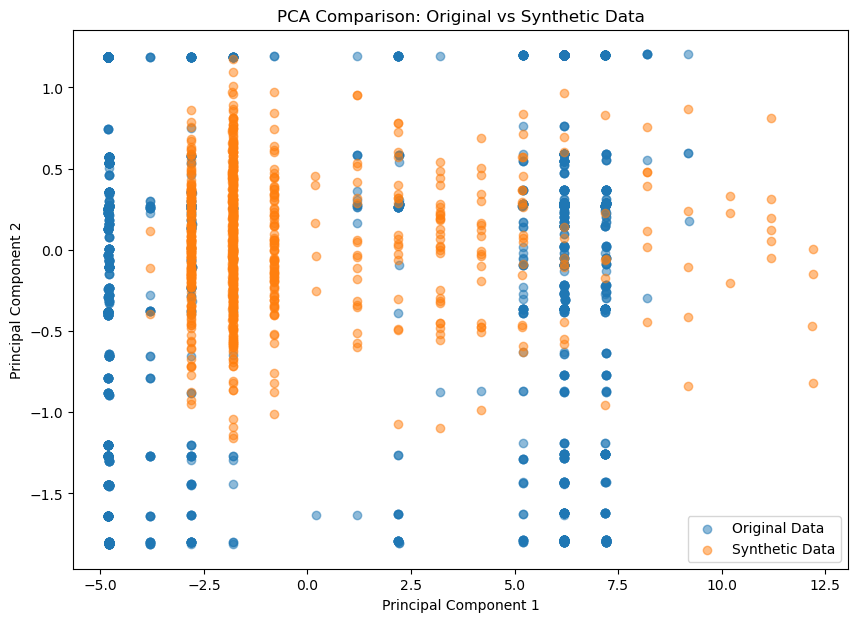

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def plot_pca_single(original_df, synthetic_df):
    """
    PCA projection of real vs synthetic data in 2D (single graph).
    """

    num_cols = [col for col in original_df.columns if pd.api.types.is_numeric_dtype(original_df[col])]

    pca = PCA(n_components=2)
    
    # Fit on combined data
    combined = pd.concat([original_df[num_cols], synthetic_df[num_cols]])
    combined_pca = pca.fit_transform(combined)

    real_pca = combined_pca[:len(original_df)]
    synth_pca = combined_pca[len(original_df):]

    plt.figure(figsize=(10, 7))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.5, label='Original Data')
    plt.scatter(synth_pca[:, 0], synth_pca[:, 1], alpha=0.5, label='Synthetic Data')
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Comparison: Original vs Synthetic Data')
    plt.show()

# Example Usage
plot_pca_single(original_df, synthetic_df)


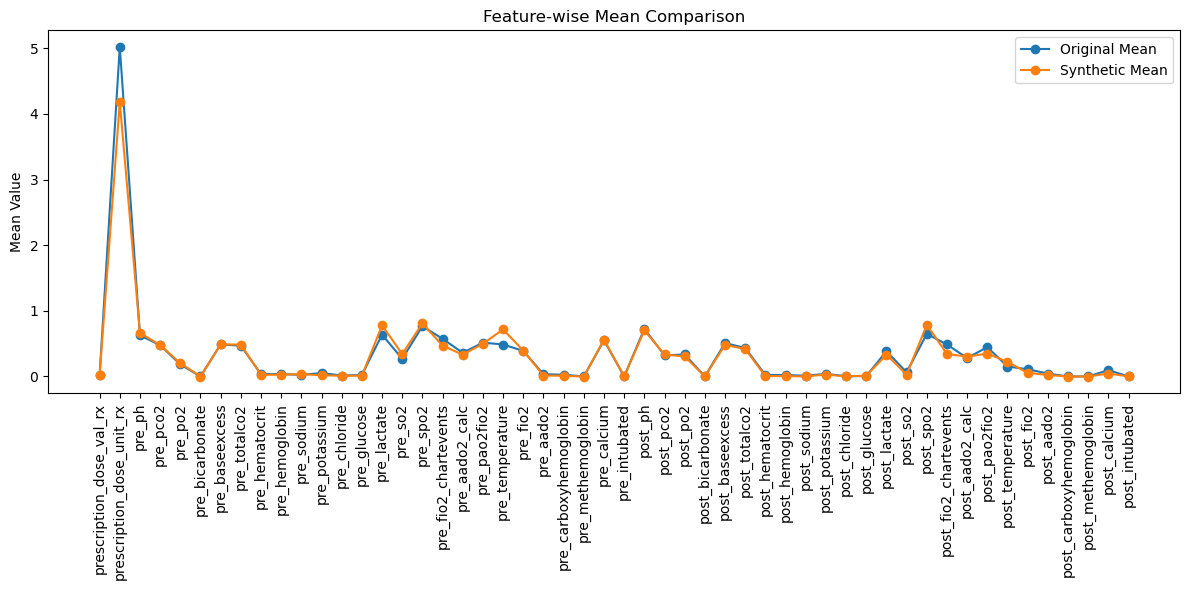

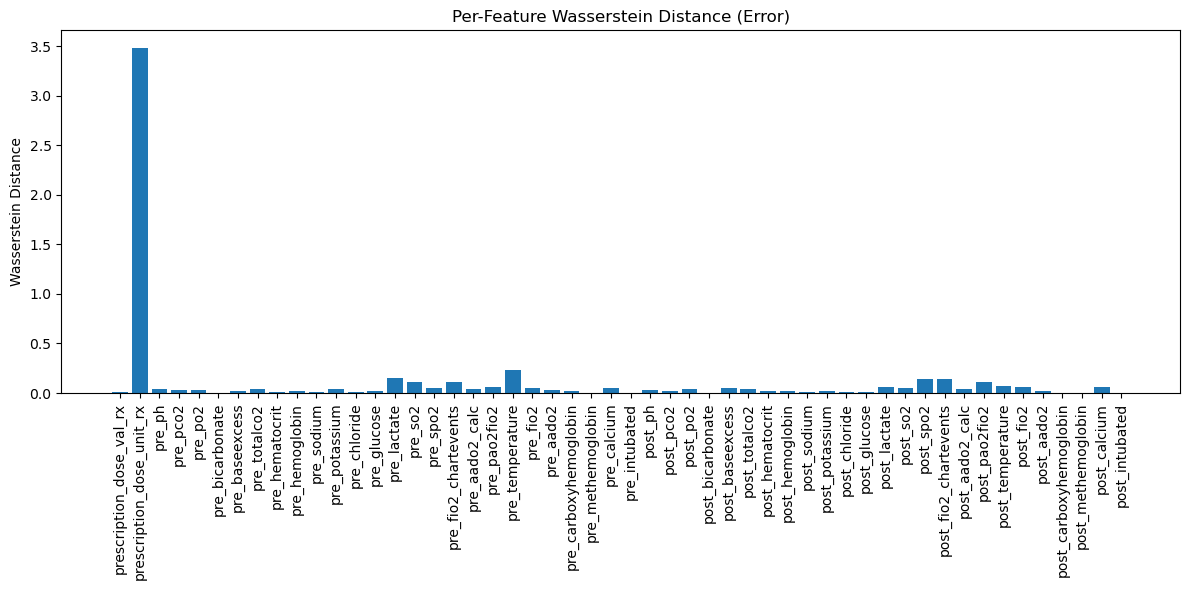

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

def compare_line_and_bar(original_df, synthetic_df):
    num_cols = [col for col in original_df.columns if pd.api.types.is_numeric_dtype(original_df[col])]

    original_means = original_df[num_cols].mean()
    synthetic_means = synthetic_df[num_cols].mean()

    # Calculate Error: Absolute Difference of Means
    error = (original_means - synthetic_means).abs()

    # Calculate Wasserstein Distance for each feature
    wass_distances = {col: wasserstein_distance(original_df[col], synthetic_df[col]) for col in num_cols}

    ### LINE GRAPH ###
    plt.figure(figsize=(12,6))
    plt.plot(num_cols, original_means, marker='o', label='Original Mean')
    plt.plot(num_cols, synthetic_means, marker='o', label='Synthetic Mean')
    plt.xticks(rotation=90)
    plt.ylabel('Mean Value')
    plt.title('Feature-wise Mean Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

    ### BAR GRAPH ###
    plt.figure(figsize=(12,6))
    plt.bar(num_cols, list(wass_distances.values()))
    plt.xticks(rotation=90)
    plt.ylabel('Wasserstein Distance')
    plt.title('Per-Feature Wasserstein Distance (Error)')
    plt.tight_layout()
    plt.show()

# Example Usage
compare_line_and_bar(original_df, synthetic_df)
